In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline
import h5py
from scipy.integrate import quad
import pickle
import pandas as pd
import warnings
from matplotlib.ticker import MultipleLocator, NullFormatter
from data_generation.variables import *
import plots as p

%load_ext autoreload
%autoreload 2

warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Load interpolations
pk_sd_interp = pickle.load(open("interps/pks_sd_interp.p", "rb"))
pk_dd_interp = pickle.load(open("interps/pks_dd_interp.p", "rb"))

# paths to styles and data
plt.style.use("Figures/style.mplstyle")
h5pydir = "h5py_dat/"

In [4]:
A_recs = [1e12, 1e14, 1e16]


In [5]:
# Get data for no recoupling
data_file = h5pydir + "class_model_data_no_rec.hdf5"
with h5py.File(data_file, "r") as f:
    tau_data = np.array(f["scalar"]["k=" + str(k)]["tau [Mpc]"])
    delta_chi_data = np.array(f["scalar"]["k=" + str(k)]["delta_idm_dr"])
    phi_data = np.array(f["scalar"]["k=" + str(k)]["phi"])
    theta_dr_data = np.array(f["scalar"]["k=" + str(k)]["theta_idr"])
    theta_data = np.array(f["scalar"]["k=" + str(k)]["theta_idm_dr"])
    Pks_no_rec = np.array(f["power_spectrum"]["Pk"])
    kks_no_rec = np.array(f["power_spectrum"]["kk"])
    kappa_dot_data_no_rec = np.flip(np.array(f["thermodynamics"]["dmu_idm_dr"]))
    z_data_no_rec = np.flip(np.array(f["thermodynamics"]["z"]))
    rho_idr_no_rec = np.array(f["background"]["(.)rho_idr"])
    rho_idm_no_rec = np.array(f["background"]["(.)rho_idm_dr"])
    bkg_zs_no_rec = np.array(f["background"]["z"])

delta_chi_no_rec = UnivariateSpline(tau_data, delta_chi_data, **spline_pars)
delta_chi_dot_no_rec = delta_chi_no_rec.derivative()
phi_no_rec = UnivariateSpline(tau_data, phi_data, **spline_pars)
phi_dot_no_rec = phi_no_rec.derivative()
theta_dr_no_rec = UnivariateSpline(tau_data, theta_dr_data, **spline_pars)
theta_chi_no_rec = UnivariateSpline(tau_data, theta_data, **spline_pars)
theta_chi_dot_no_rec = theta_chi_no_rec.derivative()

# Get data for recouplings
delta_chi_arr = []
delta_chi_dot_arr = []
delta_chi_ddot_arr = []
phi_dot_arr = []
phi_ddot_arr = []
Pk_arr = []
kappa_dot_taus_arr = []
kappa_dot_zs_arr = []
z_arr = []
tau_arr = []
thermo_tau_arr = []
theta_dr_arr = []
rho_idr_arr = []
rho_idm_arr = []
theta_chi_dot_arr = []
theta_chi_arr = []
cx2_chi_arr = []
a_prime_arr = []
a_arr = []
psi_arr = []

for A_rec in A_recs:
    data_file = h5pydir + "class_model_data_" + "%.2e" % A_rec + ".hdf5"

    with h5py.File(data_file, "r") as f:
        tau_data = np.array(f["scalar"]["k=" + str(k)]["tau [Mpc]"])
        delta_chi_data = np.array(f["scalar"]["k=" + str(k)]["delta_idm_dr"])
        phi_data = np.array(f["scalar"]["k=" + str(k)]["phi"])
        kappa_dot_data = np.flip(np.array(f["thermodynamics"]["dmu_idm_dr"]))
        z_data = np.flip(np.array(f["thermodynamics"]["z"]))
        thermo_tau_data = np.flip(np.array(f["thermodynamics"]["conf. time [Mpc]"]))
        cx2_data = np.flip(np.array(f["thermodynamics"]["c_idm_dr^2"]))
        theta_data = np.array(f["scalar"]["k=" + str(k)]["theta_idm_dr"])
        theta_dr_data = np.array(f["scalar"]["k=" + str(k)]["theta_idr"])
        psi_data = np.array(f["scalar"]["k=" + str(k)]["psi"])
        rho_idr_data = np.array(f["background"]["(.)rho_idr"])
        rho_idm_data = np.array(f["background"]["(.)rho_idm_dr"])
        bkg_tau_data = np.array(f["background"]["conf. time [Mpc]"])
        Pks = np.array(f["power_spectrum"]["Pk"])
        kks = np.array(f["power_spectrum"]["kk"])

    rho_idr = UnivariateSpline(bkg_tau_data, rho_idr_data, **spline_pars)
    rho_idm = UnivariateSpline(bkg_tau_data, rho_idm_data, **spline_pars)

    delta_chi = UnivariateSpline(tau_data, delta_chi_data, **spline_pars)
    delta_chi_dot = delta_chi.derivative()
    delta_chi_ddot = delta_chi_dot.derivative()

    phi = UnivariateSpline(tau_data, phi_data, **spline_pars)
    phi_dot = phi.derivative()
    phi_ddot = phi_dot.derivative()

    theta_chi = UnivariateSpline(tau_data, theta_data, **spline_pars)
    theta_chi_dot = theta_chi.derivative()
    theta_dr = UnivariateSpline(tau_data, theta_dr_data, **spline_pars)

    psi = UnivariateSpline(tau_data, psi_data, **spline_pars)
    cx2_chi = UnivariateSpline(thermo_tau_data, cx2_data, **spline_pars)

    kappa_dot_taus = UnivariateSpline(thermo_tau_data, kappa_dot_data, **spline_pars)
    kappa_dot_zs = UnivariateSpline(
        np.flip(z_data), np.flip(kappa_dot_data), **spline_pars
    )
    thermo_taus = UnivariateSpline(
        np.flip(z_data), np.flip(thermo_tau_data), **spline_pars
    )

    a_data = 1 / (1 + z_data)
    a = UnivariateSpline(thermo_tau_data, a_data, **spline_pars)
    aprime = a.derivative()

    delta_chi_arr.append(delta_chi)
    delta_chi_dot_arr.append(delta_chi_dot)
    delta_chi_ddot_arr.append(delta_chi_ddot)
    Pk_arr.append(Pks)
    kappa_dot_taus_arr.append(kappa_dot_taus)
    kappa_dot_zs_arr.append(kappa_dot_zs)
    z_arr.append(z_data)
    tau_arr.append(tau_data)
    phi_dot_arr.append(phi_dot)
    phi_ddot_arr.append(phi_ddot)
    thermo_tau_arr.append(thermo_taus)
    theta_dr_arr.append(theta_dr)
    rho_idr_arr.append(rho_idr)
    rho_idm_arr.append(rho_idm)
    theta_chi_arr.append(theta_chi)
    theta_chi_dot_arr.append(theta_chi_dot)
    cx2_chi_arr.append(cx2_chi)
    a_prime_arr.append(aprime)
    a_arr.append(a)
    psi_arr.append(psi)

In [7]:
N_points = 100
# Values over which dd interpolation is defined (This is hardcoded)
T_rec_arr = np.logspace(5, 7, N_points)
A_rec_arr = np.logspace(-1, 3, N_points)

In [20]:
idx = 68
idx_add = idx + 4
idx_sub = idx - 8

print(
    "Showing interpolation between points with A_rec = %.2e, T_rec = %.2e and A_rec = %.2e, T_rec = %.2e"
    % (A_rec_arr[idx], T_rec_arr[idx], A_rec_arr[idx_sub], T_rec_arr[idx_add])
)

Showing interpolation between points with A_rec = 5.59e+01, T_rec = 2.36e+06 and A_rec = 2.66e+01, T_rec = 2.85e+06


In [25]:
Hinterp = pickle.load(open('interps/H_interp.p','rb')) #Gives H(z)

In [76]:
mx = m_idm # in eV
z_eq = 3400

# z_kd = zs[375]
z_kd = T_rec_arr[idx]/(2.73*xi_idr)
# T_kd = (2.73*0.3)*(1+z_kd)*8.6173e-5 # in eV
T_kd = T_rec_arr[idx]*8.6173e-5 # in eV

a_kd = 1/(1+z_kd)
a0 = 1
H_kd = Hinterp(z_kd)
H_eq = Hinterp(z_eq)
a_eq = 1/(1+z_eq)
k_kd = 1.8*np.sqrt(mx/T_kd) * a_kd/a0*H_kd
k_fs = np.sqrt(mx/T_kd) * (a_eq/a_kd)/np.log(4*a_eq/a_kd)*a_eq/a0*H_eq
k_damp = (1/(k_fs**2) + 1/(k_kd**2))**(-0.5)
print('k_kd:', k_kd, 'k_fs:', k_fs, 'k_damp: ', k_damp)

k_kd: 24.90569393321599 k_fs: 2.4033923596785987 k_damp:  2.3922794845835615


In [77]:
# np.where(dmus2 < 1e-3)
# z_kd2 = zs[401]
z_kd2 = T_rec_arr[idx_add]/(2.73*0.3)

# T_kd2 = 2.73*(1+z_kd2)*8.6173e-5 # in eV
T_kd2 = T_rec_arr[idx_add]*8.6173e-5 # in eV


a_kd2 = 1/(1+z_kd2)
H_kd2 = Hinterp(z_kd2)
k_kd2 = 1.8*np.sqrt(mx/T_kd2) * a_kd2/a0*H_kd2
k_fs2 = np.sqrt(mx/T_kd2) * (a_eq/a_kd2)/np.log(4*a_eq/a_kd2)*a_eq/a0*H_eq
k_damp2 = (1/(k_fs2**2) + 1/(k_kd2**2))**(-0.5)
print('k_kd2:', k_kd2, 'k_fs2:', k_fs2, 'k_damp2: ', k_damp2)

k_kd2: 27.331059702109073 k_fs2: 2.5787039792446893 k_damp2:  2.567302171479735


In [31]:
1/h*Hinterp(z_kd)*1/(1+z_kd)

9.245204197036673

In [42]:
print(28/24, k_kd2/k_kd)

1.1666666666666667 1.0973819792131327


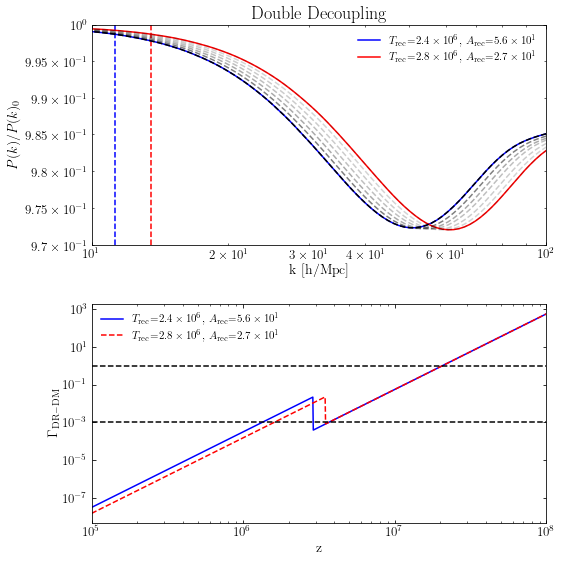

In [84]:
Tr0 = T_rec_arr[0]
Ar0 = A_rec_arr[0]
Tr1 = T_rec_arr[idx]
Tr2 = T_rec_arr[idx_add]
Ar1 = A_rec_arr[idx]
Ar2 = A_rec_arr[idx_sub]
num_interps = 7

T_interps = np.logspace(np.log10(Tr1), np.log10(Tr2), num_interps)
A_interps = np.logspace(np.log10(Ar1), np.log10(Ar2), num_interps)

zs = np.logspace(5, 8, 1000)
dmus1 = [p.dmu_idm_dr(Tr1, Ar1, z) for z in zs]
dmus2 = [p.dmu_idm_dr(Tr2, Ar2, z) for z in zs]

fig = plt.figure(1, figsize=(8, 8))
plt.subplot(211)

# plt.plot(2*[k_kd], [0,1], 'b--')
# plt.plot(2*[k_kd2], [0,1], 'r--')

plt.plot(2*[1.8*a_kd*H_kd], [0,1], 'b--')
plt.plot(2*[1.8*a_kd2*H_kd2], [0,1], 'r--')

plt.plot(
    kk,
    pk_dd_interp((Tr1, Ar1, kk)) / pk_dd_interp((Tr0, Ar0, kk)),
    "b",
    label="$T_\mathrm{rec}$=%s, $A_\mathrm{rec}$=%s"
    % (p.scientific_format(Tr1), p.scientific_format(Ar1)),
)
plt.plot(
    kk,
    pk_dd_interp((Tr2, Ar2, kk)) / pk_dd_interp((Tr0, Ar0, kk)),
    "r",
    label="$T_\mathrm{rec}$=%s, $A_\mathrm{rec}$=%s"
    % (p.scientific_format(Tr2), p.scientific_format(Ar2)),
)
for num_interp in range(num_interps):
    plt.plot(
        kk,
        pk_dd_interp((T_interps[num_interp], A_interps[num_interp], kk))
        / pk_dd_interp((Tr0, Ar0, kk)),
        "--k",
        alpha=1 / (num_interp + 1),
    )
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e1, 1e2)
plt.ylim(0.97, 1)
plt.xlabel("k [h/Mpc]")
plt.ylabel("$P(k)/P(k)_0$")
plt.legend()
plt.title("Double Decoupling")
plt.subplot(212)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("z")
plt.ylabel("$\Gamma_{\mathrm{DR-DM}}$")
plt.plot(
    zs,
    dmus1,
    "b",
    label="$T_\mathrm{rec}$=%s, $A_\mathrm{rec}$=%s"
    % (p.scientific_format(Tr1), p.scientific_format(Ar1)),
)
plt.plot(
    zs,
    dmus2,
    "r--",
    label="$T_\mathrm{rec}$=%s, $A_\mathrm{rec}$=%s"
    % (p.scientific_format(Tr2), p.scientific_format(Ar2)),
)
plt.plot(np.logspace(5, 8, 100), 1e-3 * np.ones(100), "--k")
plt.plot(np.logspace(5, 8, 100), np.ones(100), "--k")

plt.xlim(zs[0], zs[-1])

plt.legend()
fig.tight_layout(h_pad=2)

plt.show()

In [86]:
np.sqrt(mx/T_rec)

0.040824829046386304

1000000000000.0
100000000000000.0
1e+16


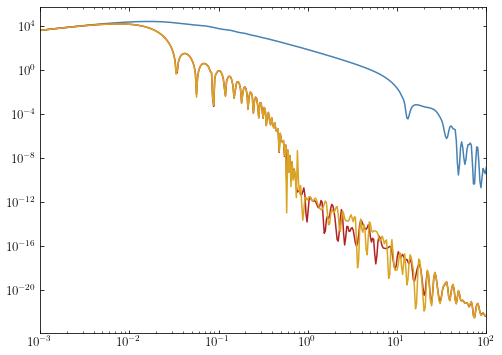

In [53]:
for i, A_rec in enumerate(A_recs):
    print(A_rec)
    plt.loglog(kk,Pk_arr[i])
    plt.xlim(1e-3,1e2)

In [59]:
1/h*H_kd*1/(1+z_kd)

2.350060100234659

In [61]:
mx = m_idm # in eV
z_eq = 3400

z_kd = T_rec/(2.73*xi_idr)
T_kd = T_rec*8.6173e-5 # in eV

a_kd = 1/(1+z_kd)
a0 = 1
H_kd = Hinterp(z_kd)
H_eq = Hinterp(z_eq)
a_eq = 1/(1+z_eq)
k_kd = 1.8*np.sqrt(mx/T_kd) * a_kd/a0*H_kd
k_fs = np.sqrt(mx/T_kd) * (a_eq/a_kd)/np.log(4*a_eq/a_kd)*a_eq/a0*H_eq
k_damp = (1/(k_fs**2) + 1/(k_kd**2))**(-0.5)
print('k_kd:', k_kd, 'k_fs:', k_fs, 'k_damp: ', k_damp)

k_kd: 12.56765266944619 k_fs: 1.4563396961697677 k_damp:  1.4466590893491118


In [74]:
Hinterp(z_kd)*a_kd

1.5876066013145265

In [71]:
1.8*np.sqrt(mx/T_kd)

7.91610003324518